<a href="https://colab.research.google.com/github/dbetanc1/MAT421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 22.4 (Numerical Error and Instability)**

There are two main issues to consider with regard to integration schemes for ODEs: accuracy and stability. Accuracy refers to a scheme’s ability to get close to the exact solution, which is usually unknown, as a function of the step size h. Previous chapters have referred to accuracy using the notation O(h^p). The same notation translates to solving ODEs. The stability of an integration scheme is its ability to keep the error from growing as it integrates forward in time. If the error does not grow, then the scheme is stable; otherwise it is unstable. Some integration schemes are stable for certain choices of h and unstable for others; these integration schemes are also referred to as unstable.

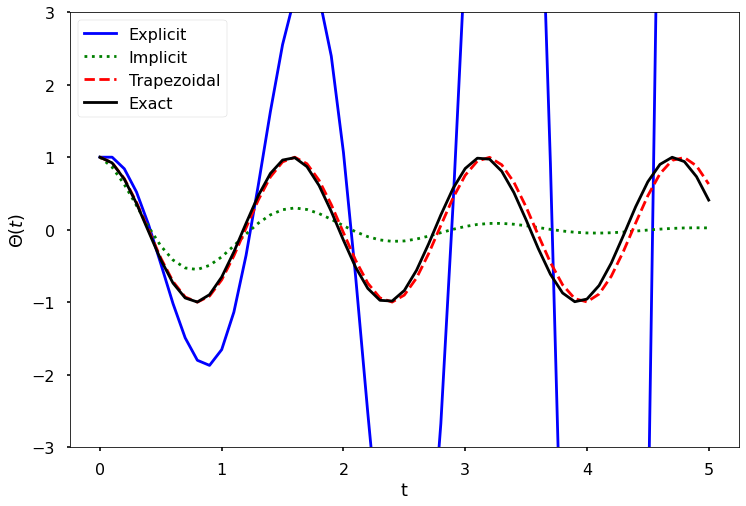

In [ ]:
#TRY IT! Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to 
#solve the pendulum equation over the time interval [0,5] in increments of 0.1 
#and for an initial solution of S0=[10]. For the model parameters using gl−−√=4.
# Plot the approximate solution on a single graph
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**Section 22.5 (Predictor-Corrector Methods)**
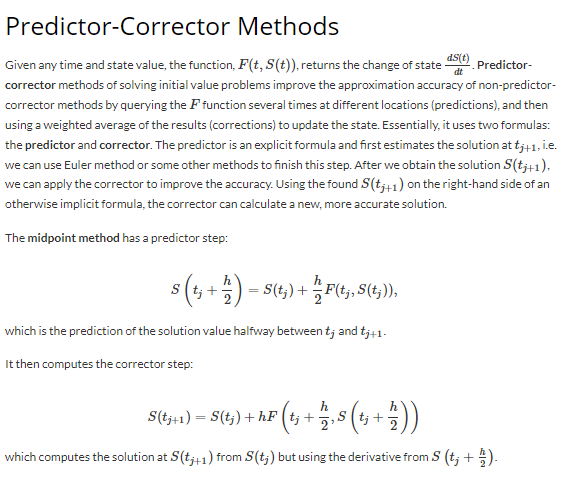

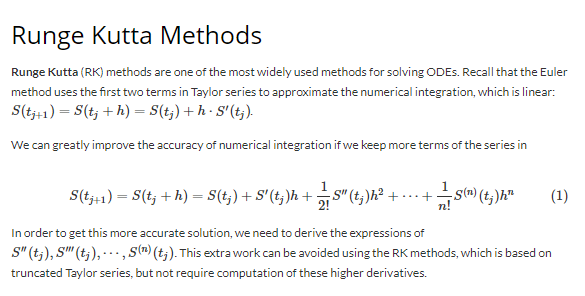

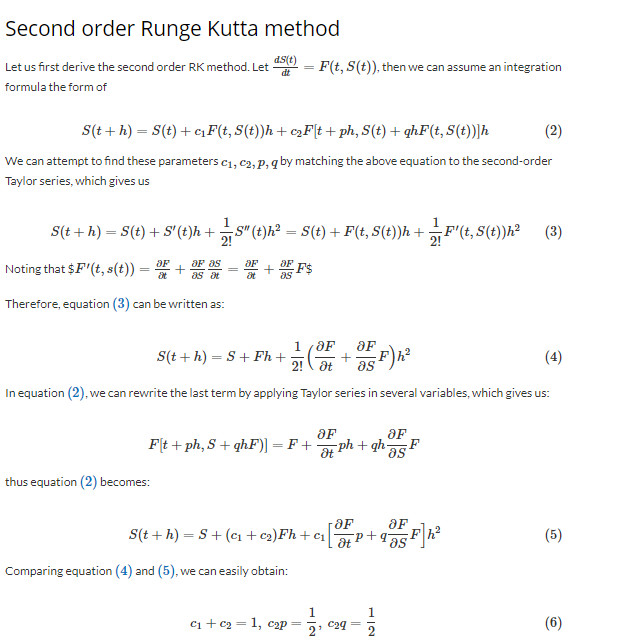

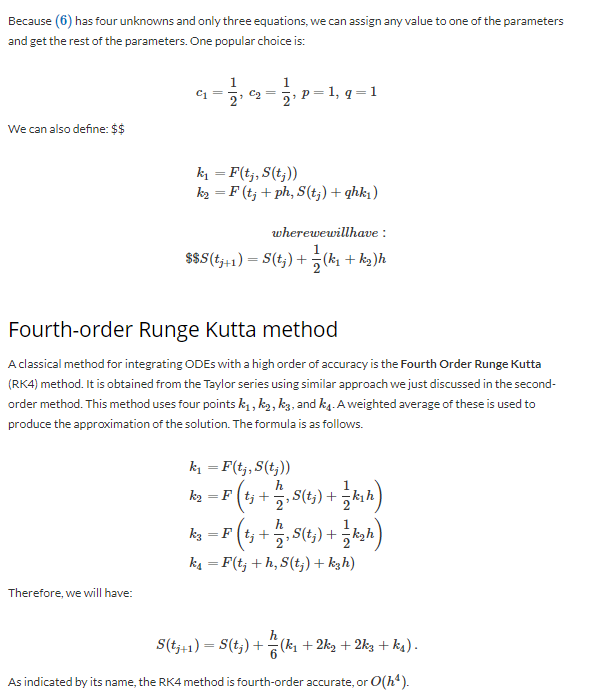

**Section 22.6 (Python ODE Solvers (IVP))**

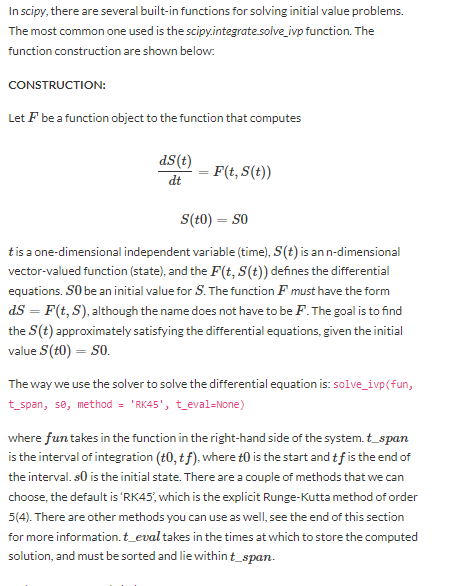
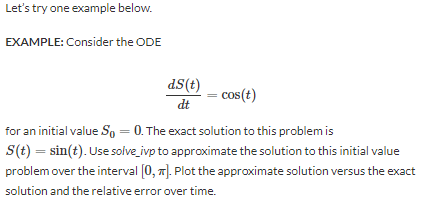


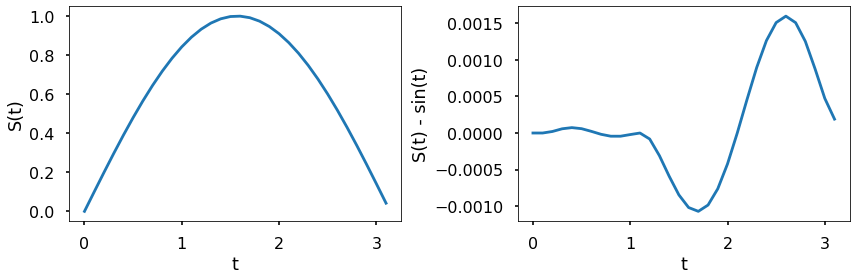

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

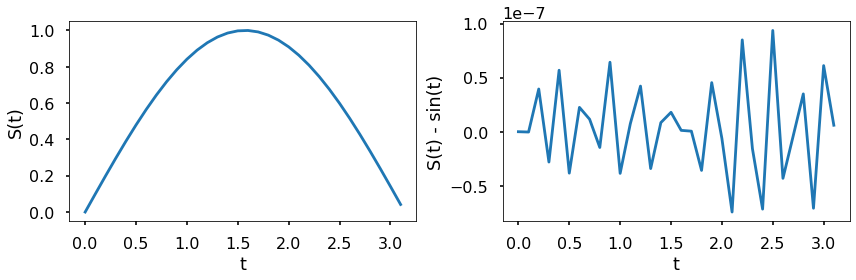

In [ ]:
#TRY IT! Using the rtol and atol to make the difference between the approximate 
#and exact solution is less than 1e-7.

sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

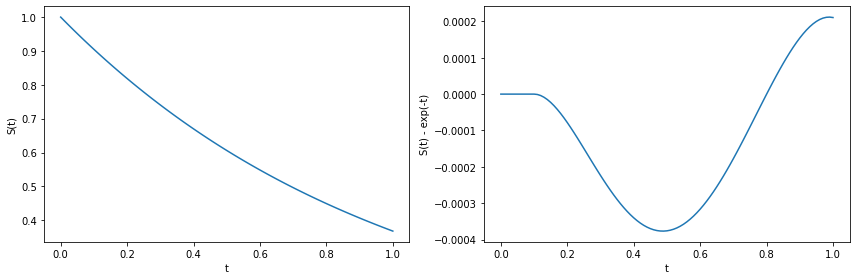

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

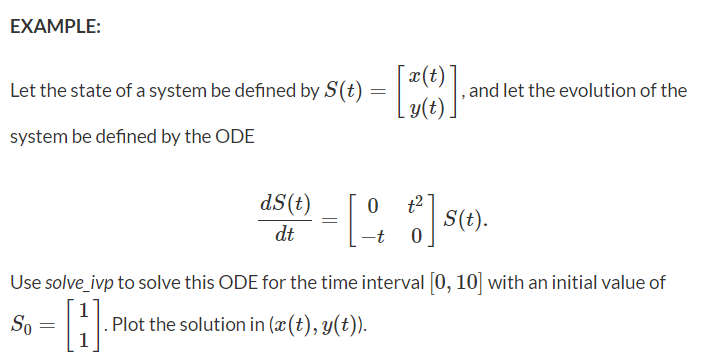

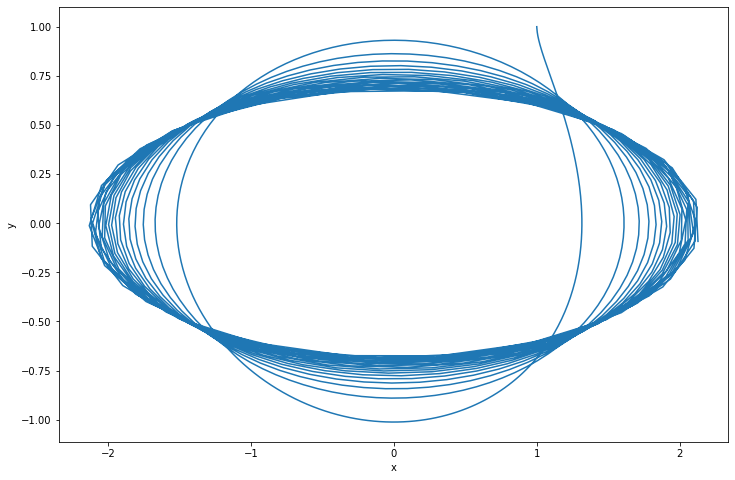

In [5]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()